In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
!pip install git+https://github.com/qubvel/segmentation_models
!pip install tensorflow==2.1.0
!pip install Keras==2.3.1
from efficientnet.keras import center_crop_and_resize, preprocess_input

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-th7eetx3
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-th7eetx3
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp36-none-any.whl size=33791 sha256=8432e42b7a0834e881ec3683afe658f0f3e0e27821359d739c4b41843c9dfc49
  Stored in directory: /tmp/pip-ephem-wheel-cache-pi4alfah/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models
     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 450kB 51.1MB/s 
     |████████████████████████████████| 3.9MB 46.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=38c96fe506752e951a6abd5bafbc2abd12820f637d170257dc8455d9f14bb133
  Stored in directory: /root/.cache/p

Using TensorFlow backend.


In [2]:
labels= os.listdir('/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/train')
print(labels)

['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']


In [3]:
#os.listdir('/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/train/{0}/'.format(labels[0]))


 NONDEMENTED


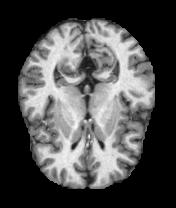

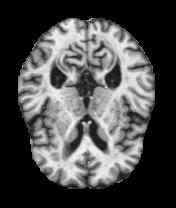

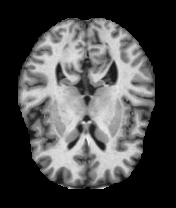

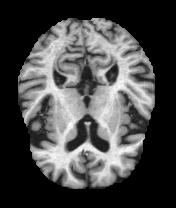

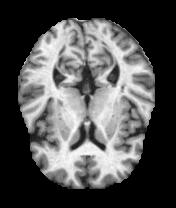

there are  2560  images in  NonDemented class

 VERYMILDDEMENTED


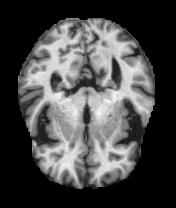

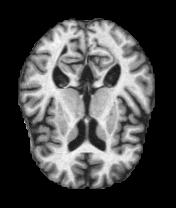

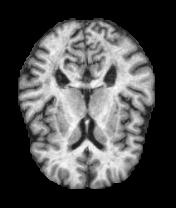

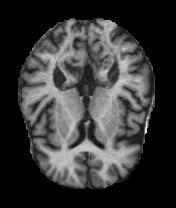

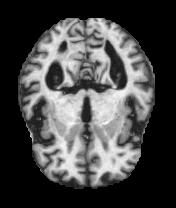

there are  1792  images in  VeryMildDemented class

 MILDDEMENTED


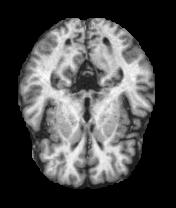

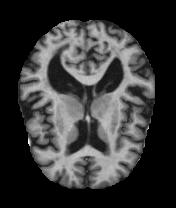

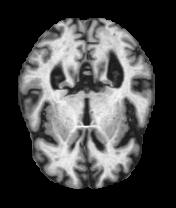

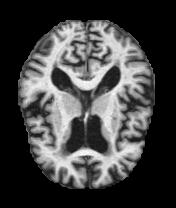

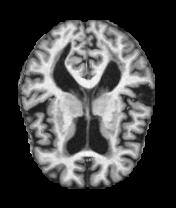

there are  717  images in  MildDemented class

 MODERATEDEMENTED


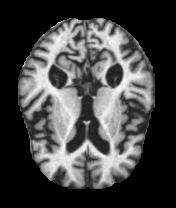

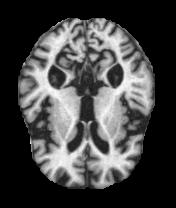

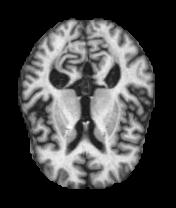

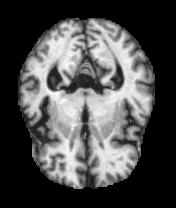

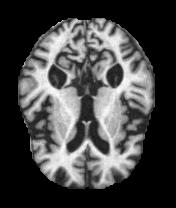

there are  52  images in  ModerateDemented class


In [4]:
num=[]
for label in labels:
  path= '/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/train/{0}/'.format(label)
  folder_data= os.listdir(path)
  k=0
  print('\n',label.upper())
  for image_path in folder_data:
    if k<5:
      display(Image(path+image_path))
    k=k+1
  num.append(k)
  print('there are ', k,' images in ', label, 'class')



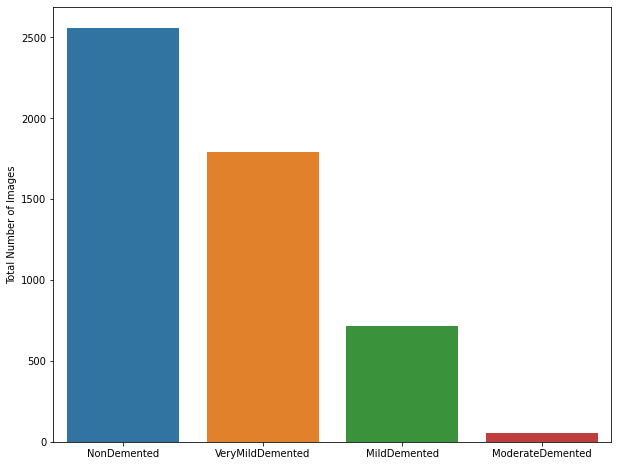

In [5]:
###Checking if we have the balance dataset or not
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(x=labels,y=num,ci=90)
plt.ylabel('Total Number of Images')
plt.show()

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  preprocessing_function=preprocess_input,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   #featurewise_center=True,
                                  #featurewise_std_normalization=True,
                                   shear_range=0.2,
                                   zoom_range=0.1,
                                   fill_mode='nearest',validation_split=0.2)

In [7]:
DATA_PATH='/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/'
IM_SIZE= (32,32,3)
train_batches = train_datagen.flow_from_directory(DATA_PATH+'train',classes=labels, target_size=(32,32),
                                                  class_mode='categorical', shuffle=True,batch_size=16)


Found 5121 images belonging to 4 classes.


In [8]:

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_batches=valid_datagen.flow_from_directory(DATA_PATH+'val',classes=labels,target_size=(32,32), 
                                  class_mode='categorical', shuffle=False, batch_size=16)

Found 0 images belonging to 4 classes.


In [9]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(DATA_PATH+'test', classes=labels,
                                                target_size=(32,32),class_mode='categorical', 
                                                shuffle=False,batch_size=16)

Found 1279 images belonging to 4 classes.


In [10]:
valid_batches.image_shape

(32, 32, 3)

In [11]:
train_batches.image_shape

(32, 32, 3)

In [12]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu', input_shape=IM_SIZE))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)         

In [ ]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])
from sklearn.utils import class_weight
from keras.callbacks.callbacks import ReduceLROnPlateau, ModelCheckpoint


In [ ]:
#x_val= []
#x_test=[]
#for label in labels:
#    #path= '/content/drive/My Drive/Projects/Natural Images/natural_images/{0}/'.format(label)
#    path= '/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/train/{0}/'.format(label)
#    folder_data = os.listdir(path)
#    x_test.append(folder_data[:50])
#    x_val.append(folder_data[50:])
     
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_batches.classes), 
                train_batches.classes)
ModelCheck = ModelCheckpoint('/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/manual_checkpoint.h5', monitor='val_loss', verbose=0, 
                             save_best_only=True, save_weights_only=True, mode='auto', period=1)


ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=3e-4)

In [ ]:
#history= net_final.fit_generator(train_batches,
#                        validation_data = test_batches,
#                        epochs = 5,
#                        steps_per_epoch=256,
#                        class_weight=class_weights, 
#                        callbacks=[ModelCheck,ReduceLR])

In [17]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path= '/content/drive/My Drive/Projects/Alzheimer/Alzheimer_s Dataset/train/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [19]:
x_data= np.array(x_data)

In [20]:
y_data= np.array(y_data)

In [21]:
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (5121, 32, 32, 3) and that of Y is:  (5121,)


In [22]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [23]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_encoded = le.fit_transform(y_data)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [24]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
###pre trained efficient netb3
#import efficientnet.tfkeras as efn #Convolutional Neural Network architecture
#from tensorflow.keras.layers import Flatten, Dense, Dropout
#from tensorflow.keras.models import Model
#from tensorflow.keras.optimizers import Adam

#net = efn.EfficientNetB3(include_top=False,
   #                     weights='imagenet',
   #                     input_tensor=None,
   #                     input_shape=X_train.shape[1:])  
#x = net.output
#x = Flatten()(x)
#x = Dropout(0.5)(x)
#output_layer = Dense(len(labels), activation='softmax', name='softmax')(x)
#net_final = Model(inputs=net.input, outputs=output_layer)     
#net_final.compile(optimizer=Adam(),
#                  loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(4, activation='softmax'))

In [27]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [28]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Stop Model training in case of no Improvement
early_stop=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
callbacks_list = [checkpoint,early_stop,reduce_lr]
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2,callbacks=callbacks_list)

Train on 2867 samples, validate on 717 samples
Epoch 1/50
2867/2867 [==============================] - 7s 3ms/step - loss: 1.0555 - accuracy: 0.4761 - val_loss: 0.9591 - val_accuracy: 0.5146

Epoch 00001: val_accuracy improved from -inf to 0.51464, saving model to weights.best.hdf5
Epoch 2/50
2867/2867 [==============================] - 1s 175us/step - loss: 0.9721 - accuracy: 0.5312 - val_loss: 0.8733 - val_accuracy: 0.5676

Epoch 00002: val_accuracy improved from 0.51464 to 0.56764, saving model to weights.best.hdf5
Epoch 3/50
2867/2867 [==============================] - 1s 177us/step - loss: 0.9374 - accuracy: 0.5469 - val_loss: 0.8481 - val_accuracy: 0.5900

Epoch 00003: val_accuracy improved from 0.56764 to 0.58996, saving model to weights.best.hdf5
Epoch 4/50
2867/2867 [==============================] - 1s 179us/step - loss: 0.8979 - accuracy: 0.5717 - val_loss: 0.8341 - val_accuracy: 0.5997

Epoch 00004: val_accuracy improved from 0.58996 to 0.59972, saving model to weights.best

In [29]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

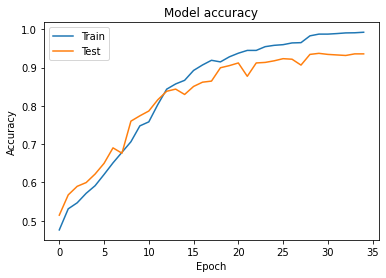

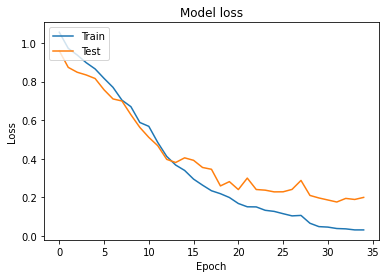

In [30]:
import matplotlib.pyplot as plot
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [31]:
Y_pred=model.predict_classes(X_test)

In [32]:
Y_test= np.argmax(Y_test, axis = 1)

In [33]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.9499024072869225


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test, Y_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       215
           1       1.00      1.00      1.00        16
           2       0.96      0.96      0.96       782
           3       0.92      0.95      0.94       524

    accuracy                           0.95      1537
   macro avg       0.97      0.95      0.96      1537
weighted avg       0.95      0.95      0.95      1537


Confusion Matrix
[[193   0   6  16]
 [  0  16   0   0]
 [  3   0 753  26]
 [  1   0  25 498]]


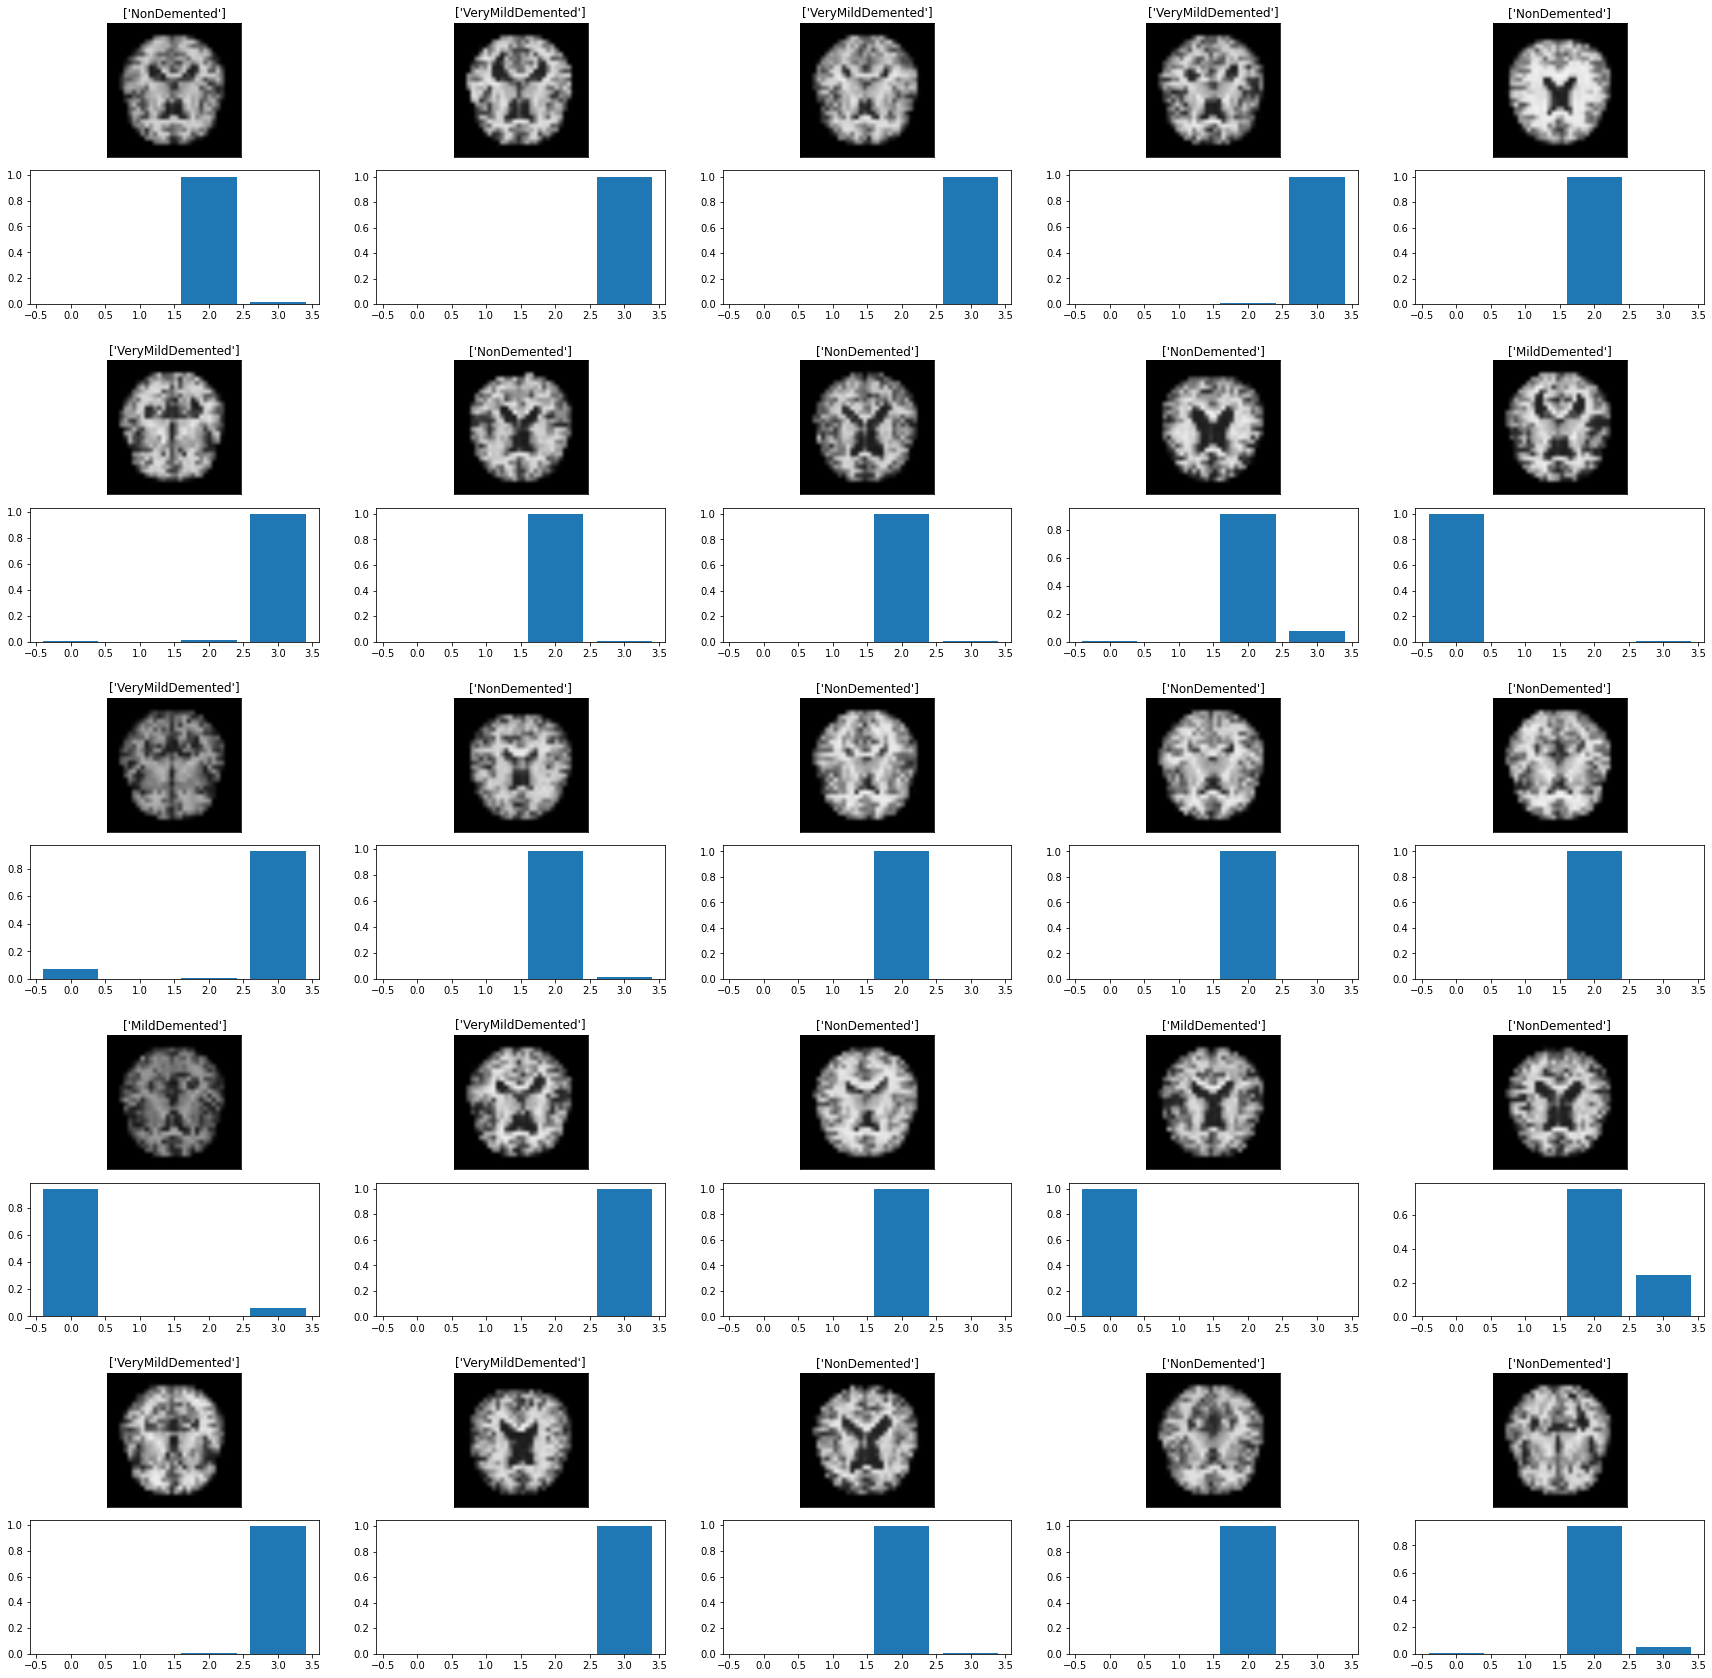

In [63]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import random

randint = random.randint
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(X_test))
    pred_image = np.array([X_test[rnd_number]]) 
    pred_class = le.inverse_transform([model.predict_classes(pred_image)[0]])
    pred_prob = model.predict(pred_image).reshape(4)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(cv2.resize(pred_image[j],(1000,1000)),cmap='gray')
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3],pred_prob)
            fig.add_subplot(ax)

fig.show()